In [37]:
# import numpy as np
# import cv2
# import math
# import scipy.misc
# import PIL.Image
# import statistics
# import timeit
# import glob
# from sklearn import linear_model, datasets

In [45]:
import cv2
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

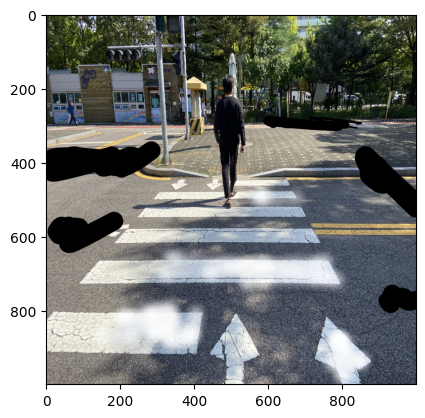

In [296]:
img = cv2.imread('C:/Users/user/Desktop/temp_img/crosswalk_processing/IMG_10.png')
# cv2.imshow('original',img)
# cv2.waitKey(0)
# cv2.destroyALLWindows()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [297]:
img.shape[:2]

(1000, 1000)

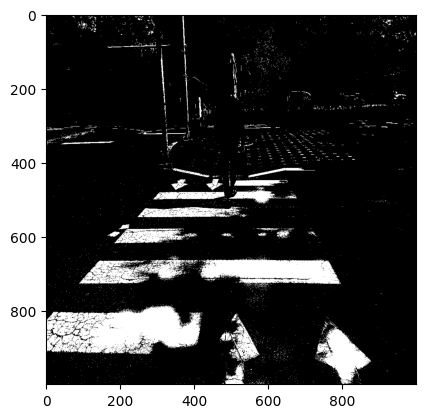

In [298]:
lower = (200,200,200 )
upper = (255, 255, 255)
thresh = cv2.inRange(img, lower, upper)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

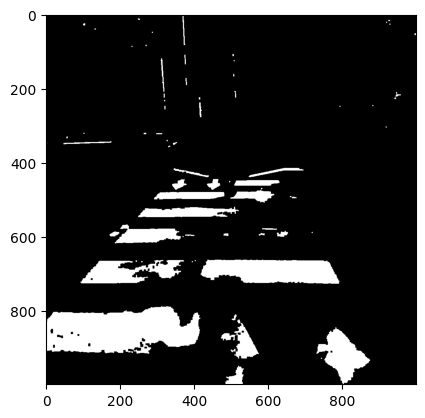

In [299]:
kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(morph, cv2.COLOR_BGR2RGB))

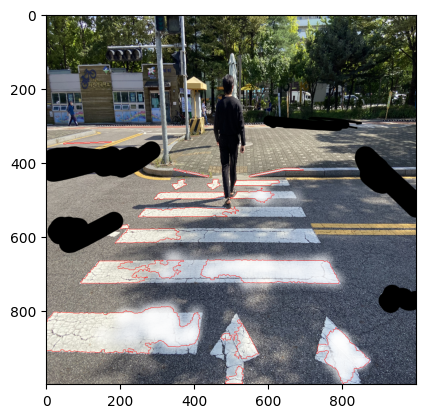

In [300]:
# # get contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# filter on area
contours = img.copy()
good_contours = []
for c in cntrs:
    area = cv2.contourArea(c)
    if area > 250  :
        cv2.drawContours(contours, [c], -1, (0,0,255), 1)
        good_contours.append(c)
plt.imshow(cv2.cvtColor(contours, cv2.COLOR_BGR2RGB))

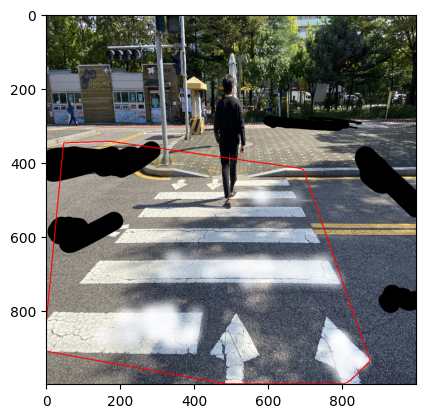

In [301]:
# # combine good contours
contours_combined = np.vstack(good_contours)
# # get convex hull

result = img.copy()
hull = cv2.convexHull(contours_combined)
cv2.polylines(result, [hull], True, (0,0,255), 2)

# write result to disk
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [295]:
import cv2
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

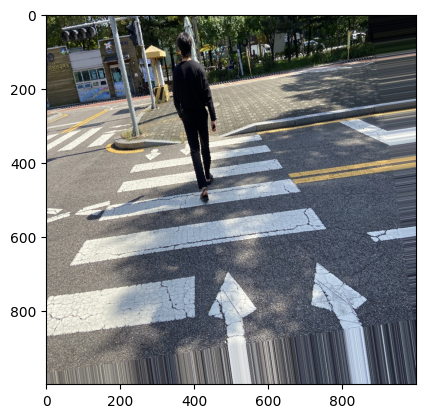

In [99]:
img = cv2.imread('C:/Users/user/Desktop/augmentation/resize_in1000/IMG_3561test2.jpg')
# cv2.imshow('original',img)
# cv2.waitKey(0)
# cv2.destroyALLWindows()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

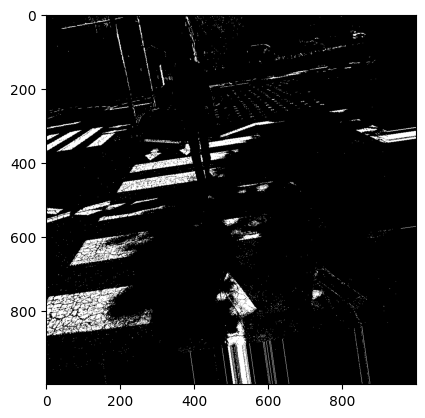

In [29]:
lower = (210,210,210 )
upper = (255, 255, 255)
thresh = cv2.inRange(img, lower, upper)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

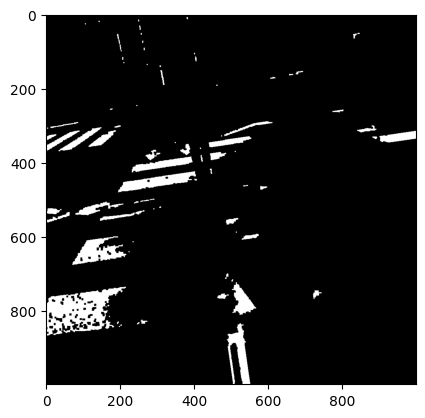

In [30]:
kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(morph, cv2.COLOR_BGR2RGB))

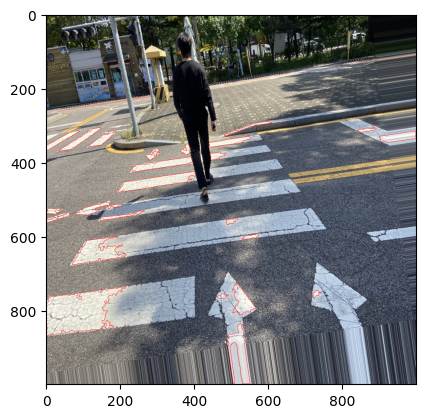

In [31]:
# # get contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# filter on area
contours = img.copy()
good_contours = []
for c in cntrs:
    area = cv2.contourArea(c)
    if area > 200 : # 요 부분이 어느 일정 이상의 흰 부분만 인식하게 만드는
        cv2.drawContours(contours, [c], -1, (0,0,255), 1)
        good_contours.append(c)
plt.imshow(cv2.cvtColor(contours, cv2.COLOR_BGR2RGB))

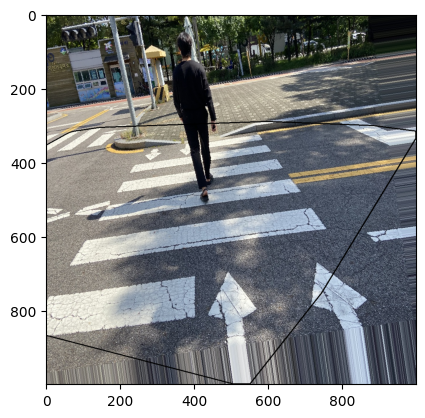

In [32]:
# # combine good contours
contours_combined = np.vstack(good_contours)
# # get convex hull

result = img.copy()
hull = cv2.convexHull(contours_combined)
cv2.polylines(result, [hull], True, (0,0,0), 2)

# write result to disk
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

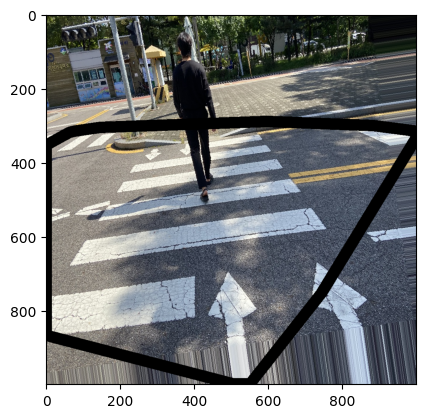

In [35]:
contours_combined = np.vstack(good_contours)

#색상 칠하기
result = img.copy()
hull = cv2.convexHull(contours_combined)
cv2.polylines(result, [hull], True, (0,0,0), 30)

#최소 , 최대 기준으로 흑백을 나눔
lower_del = (10 , 10 , 10)
upper_del = (300 ,300 ,300)
color_del = cv2.inRange(result, lower_del, upper_del)

#노이즈 제거
kernel_del = np.ones((3,3), np.uint8)
morph_del = cv2.morphologyEx(color_del, cv2.MORPH_OPEN, kernel_del)
kernel_del = np.ones((5,5), np.uint8)
morph_del = cv2.morphologyEx(morph_del, cv2.MORPH_CLOSE, kernel_del)

plt.imshow(cv2.cvtColor(morph_del, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
